## Genetic Algorithm

In [ ]:
import random as rd

# Target can be random
# def foo(ba, n, dmax):
#   return ba/(n+1) - dmax - 0.5
# 
seed = 1
rd.set.seed()
def foo(xd, xg, xv, ba, bv, c, n_neigh):
  return init_cancerGDV(xd, xg, xv, ba, bv, c, n_neigh)

def fitness(xd, xg, xv, ba, bv, c, n_neigh):
  ans = foo(xd, xg, xv, ba, bv, c, n_neigh)
  
  return ba

# generate solutions
solutions = []
for s in range(1000):
  xv = 0
  xd = 0
  xg = 0
  while xv <= 0:
    xd = rd.uniform(0, 1)
    xg = rd.uniform(0, 1)
    xv = 1-xd-xg

  #   
  ba = rd.uniform(0, 100)
  bv = rd.uniform(0, 100)
  c = rd.uniform(0, 100)
  n_neigh = int(rd.uniform(0, 100))

  solutions.append((xd, xg, xv, ba, bv, c, n_neigh))
  
for i in range(10000):
  rankedsolutions = []
  for s in solutions:
    rankedsolutions.append( (fitness(s[0], s[1], s[2], s[3], s[4], s[5], s[6]),s) )
  rankedsolutions.sort()
  rankedsolutions.reverse()
  print(rankedsolutions)
  break

#   print(f"=== Gen{i} best solutions ===")
#   print(rankedsolutions[0]) 

#   if rankedsolutions[0][0]-0.000001:
#     break
  
#   bestsolutions = rankedsolutions[:100]

#   elements = []
#   for s in bestsolutions:
#     elements.append(s[1][0])
#     elements.append(s[1][1])
#     elements.append(s[1][2])
#     elements.append(s[1][3])
#     elements.append(s[1][4])
#     elements.append(s[1][5])
#     elements.append(s[1][6])

#   # Mutation
#   newGen = []
#   for _ in range(1000):
#     e0 = rd.choice(elements) * rd.uniform(0.99,1.01)
#     e1 = rd.choice(elements) * rd.uniform(0.99,1.01)
#     e2 = rd.choice(elements) * rd.uniform(0.99,1.01)
#     e3 = rd.choice(elements) * rd.uniform(0.99,1.01)
#     e4 = rd.choice(elements) * rd.uniform(0.99,1.01)
#     e5 = rd.choice(elements) * rd.uniform(0.99,1.01)
#     e6 = rd.choice(elements) * rd.uniform(0.99,1.01)

#     newGen.append( (e0, e1, e2, e3, e4, e5, e6) )

#   solutions = newGen  
# # solutions[:5]

Treatment fail at 1.12
Treatment fail at 3.43
Treatment fail at 0.17
Treatment succeed at 0.0
Treatment fail at 7.74
Treatment succeed at 0.25
Treatment fail at 7.8
Treatment fail at 8.71
Treatment fail at 3.45
Treatment fail at 3.87
Treatment fail at 5.93
Treatment fail at 0.92
Treatment fail at 18.080000000000002
Treatment fail at 2.67
Treatment fail at 0.08
Treatment fail at 7.41
Treatment fail at 8.01
Treatment succeed at 0.05
Treatment fail at 5.45
Treatment fail at 0.11
Treatment fail at 17.68
Treatment fail at 22.79
Treatment succeed at 0.07
Treatment fail at 5.08
Treatment fail at 2.34
Treatment fail at 5.3100000000000005
Treatment fail at 9.6
Treatment fail at 5.63
Treatment fail at 0.49
Treatment fail at 2.69
Treatment fail at 22.990000000000002
Treatment fail at 4.91
Treatment fail at 0.87
Treatment fail at 12.73
Treatment fail at 3.9
Treatment succeed at 0.0
Treatment fail at 1.82
Treatment fail at 3.88
Treatment fail at 7.18
Treatment fail at 35.44
Treatment succeed at 0.0

# Cancer game 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

def init_cancerGDV(
    xd = 0.04, 
    xg = 0.9, 
    xv = 0.06,
    ba = 2.5,
    bv = 2,
    c = 1,
    n_neigh = 4,
    dt = 0.01,
    iter = 3000,
    threshold = 10**(-1.5),
    sigma = 0.01, 
    d = None, timeframe = None, visual = True 
):
    """Function to plot static evolution of cancer game.

    Arguments
    ---------
        xd (float): subpopulation proportion of DEF tumor; 
            default 0.04

        xg (float): subpopulation proportion of GLY tumor; 
            default 0.9

        xv (float): subpopulation proportion of VOP tumor; 
            default 0.06

        ba (float): the benefit per unit of acidification; 
            default 2.5

        bv (float): the benefit from thge oxygen per unit of vascularization; 
            default 2

        c (float): the cost of production VEGF; default 1

        n_neigh (float): the number of GLY cells in the interaction group;
            default 4

        dt (float): time differentiation; 
            default 0.0001

        iter (int): tumors' evolutionary time dependency;
            default 500000
        
        rb (float): recovery barrier;
            default 10**(-1.5)
        
        fb (float): failure barrier;
            default 10**(-1.5)
        
        d (list): constraint medicine; 
            default None
        
        timeframe (list): update timeframe for injecting medicine;
            default None

        sigma (float): penalty for medicine computation;
            default 0.01
    Returns
    -------
        2 matplotlib figure objects containing the designated simplex (3D and 2D).
    """

    # Evolution of subpopulation propotions
    xdpoints = [xd]
    xgpoints = [xg]
    xvpoints = [xv]
    ppoints = [xg]
    qpoints = [xv/(xv + xd)]
    rate_p = []
    rate_q = []
  

    # game_proceed = 1
    win = []
    
    succeed = threshold
    fail = 1-threshold

    q = xv/(xv + xd)
    p = xg
    # start_time = time.time()
    t = 0
    # for t in range(iter):
    while True:
      prev_q = q
      prev_p = p

      dq = 0
      dp = 0
      sum_p = 0

      for k in range(0, n_neigh):
        sum_p += p**k
      dq = q * (1 - q) * (bv/(n_neigh+1) * sum_p - c) * dt
      q += dq
      
      
      if (ba/(n_neigh+1) - (bv - c) * 0.9999 - d) < 0:
        dp =  p * (1 - p) * (ba/(n_neigh+1) - (bv - c) * prev_q) * dt
      else:
        return 0
    
      if t > 500000:
        return 500000
      p += dp

      # Convert from 2-D to 3-D
      xd = (1 - q) * (1 - p)
      xg = p
      xv = (1 - p) * q

      ppoints.append(p)
      qpoints.append(q)

      rate_p.append(dp)
      rate_q.append(dq)

      xdpoints.append(xd)
      xgpoints.append(xg)
      xvpoints.append(xv)

      
      
      # Terminal condition
      if p <= succeed:
        win = 1
        # print("Treatment succeed at " + str(t*dt))
        break
          
      elif p >= fail:
        win = 0
        # print("Treatment fail at " + str(t*dt))
        break
      
      t += 1

    total_cost = 0
    # Total cost for the treatment
    # total_cost = 0
    # if timeframe != None:
      # for i in range(len(timeframe)):
        # time_treatment = (timeframe[i][1]-timefrae)*dt
      # print("Total time treatment: ", time_treatment)

      # total_cost = time_treatment*(d+sigma) + sigma*timelow*dt
      # total_cost = time_treatment*(d+sigma)
      # print("Total cost: ", total_cost)

    # print("Time: ", t)

    fig_2D, fig_3D = None, None
    if visual == True: 
      # 2D visualization
      fig_2D = plt.figure(figsize=(15,7))
      plt.axhline(succeed, color="g", linestyle='dashed', label="Succeed barrier")
      plt.axhline(fail, color="r", linestyle='dashed', label="Fail barrier")
    
      length = len(xgpoints)
      plt.plot(xgpoints, label="GLY", color="purple")
      plt.plot(xdpoints, label="DEF", color="royalblue")
      plt.plot(xvpoints, label="VOP", color="orange")

      # plt.plot(rate_p, label="p")
      # plt.plot(rate_q, label="q")

      if timeframe != None:
        for i in range(len(timeframe)):
          plt.axvspan(timeframe[i][0], timeframe[i][1], facecolor="red", alpha=0.15)

      plt.xlabel("Time", fontweight="bold", fontsize='x-large')
      plt.xlim(0, t)
      plt.xticks(np.arange(0, t, 500), np.arange(0, t*dt, 500*dt))
      plt.ylim(0, 1)
      plt.ylabel("Subpopulation proportions", fontweight="bold", fontsize='x-large')
      plt.legend()

      # 3D visualization
      dynamic = []
      dynamic.append(xdpoints)
      dynamic.append(xgpoints)
      dynamic.append(xvpoints)
      dynamic = np.array(dynamic)
      dynamic = dynamic.transpose()
      fail = fail*(np.sqrt(3)/2)
      succeed = succeed*(np.sqrt(3)/2)
      # print(fail)

      transformation = np.array([[1,0],
                                [0.5, np.sqrt(3)/2],
                                [0,0]])
      dynamic_2D = np.matmul(dynamic, transformation)

      fig_3D = plt.figure(figsize=(7,7))
      plt.plot([1,0,0.5,1], [0,0,np.sqrt(3)/2,0])
      plt.plot(dynamic_2D[:, 0], dynamic_2D[:, 1], color='g', label="No therapy")

      if timeframe != None:
        for i in range(len(timeframe)):
          plt.plot(dynamic_2D[timeframe[i][0]:timeframe[i][1], 0], dynamic_2D[timeframe[i][0]:timeframe[i][1], 1], color='r', label="Therapy applied")
      plt.ylim(0, 1)
      plt.xlim(0, 1)

      plt.axhline(succeed, color="g", linestyle='dashed', label="Succeed barrier")
      plt.axhline(fail, color="r", linestyle='dashed', label="Fail barrier")
    else:
      return t

    return fig_2D, fig_3D, total_cost

In [7]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

import pandas as pd
import random as rd
import os
import gc

path = "gdrive/My Drive/Colab Notebooks/EAAI21/data/"

Mounted at /content/gdrive/


In [15]:
list_xd = []
list_xg = []
list_xv = [] 

list_ba = []
list_bv = []
list_c = []
list_n_neigh = []
time_end = []


# for t in range(0, 10):
for i in range(50000):
  xv = 0
  xd = 0
  xg = 0

  while xv <= 0:
    xd = rd.uniform(0, 1)
    xg = rd.uniform(0, 1)
    xv = 1-xd-xg

  ba = rd.uniform(0, 100)
  bv = rd.uniform(0, 100)
  c = rd.uniform(0, 100)
  d = rd.uniform(0, 100)
  n_neigh = int(rd.uniform(0, 100))
  threshold = rd.uniform(10**(-1.5),10**(-1))

  time_end.append(init_cancerGDV(xd, xg, xv, ba, bv, c, n_neigh, threshold=threshold, visual=False, d=d))
  list_xd.append(xd)
  list_xg.append(xg)
  list_xv.append(xv)

  list_ba.append(ba)
  list_bv.append(bv)
  list_c.append(c)
  list_n_neigh.append(n_neigh)

  if i%100 == 0:
    print("Obtained " + str(i) + ' games.')
    df = pd.DataFrame({'xg': list_xg, 'xd': list_xd, 'xv': list_xv, 'ba': list_ba, 'bv': list_bv,  'c': list_c, 'n_neigh': list_n_neigh, 'd':d, 'threshold':threshold, 'solvability': time_end})
    df.to_csv(path+'solvability.csv', index=False)
  # gc.collect()
  # os.system('cls||clear')
  # print("Finished file: " + 'solvability_' + str(t) + '.csv')

Obtained 0 games.
Obtained 100 games.
Obtained 200 games.
Obtained 300 games.
Obtained 400 games.
Obtained 500 games.
Obtained 600 games.
Obtained 700 games.
Obtained 800 games.
Obtained 900 games.
Obtained 1000 games.
Obtained 1100 games.
Obtained 1200 games.
Obtained 1300 games.
Obtained 1400 games.
Obtained 1500 games.
Obtained 1600 games.
Obtained 1700 games.
Obtained 1800 games.
Obtained 1900 games.
Obtained 2000 games.
Obtained 2100 games.
Obtained 2200 games.
Obtained 2300 games.
Obtained 2400 games.
Obtained 2500 games.
Obtained 2600 games.
Obtained 2700 games.
Obtained 2800 games.
Obtained 2900 games.
Obtained 3000 games.
Obtained 3100 games.
Obtained 3200 games.
Obtained 3300 games.
Obtained 3400 games.
Obtained 3500 games.
Obtained 3600 games.
Obtained 3700 games.
Obtained 3800 games.
Obtained 3900 games.
Obtained 4000 games.
Obtained 4100 games.
Obtained 4200 games.
Obtained 4300 games.
Obtained 4400 games.
Obtained 4500 games.
Obtained 4600 games.
Obtained 4700 games.
Obta

In [ ]:
df = pd.read_csv(path+'100000gametime.csv')
df

In [ ]:
df

,xg,xd,xv,ba,bv,c,n_neigh
0,0.111197,0.205951,0.682852,50.455598,78.772910,28.949396,38
1,0.006135,0.664818,0.329046,75.845582,96.036470,1.637269,65
2,0.743755,0.173462,0.082782,57.349317,7.043947,67.983339,83
3,0.054064,0.228129,0.717807,6.581945,45.935892,57.846274,19
4,0.010283,0.167595,0.822122,69.081789,85.150314,47.790085,20
...,...,...,...,...,...,...,...
19996,0.121301,0.717017,0.161683,18.958413,51.826091,91.148341,55
19997,0.509346,0.292222,0.198432,0.598300,32.255894,38.789502,7
19998,0.421739,0.429374,0.148887,90.235980,65.567252,44.250193,79
19999,0.314401,0.216910,0.468689,42.691723,95.368244,10.616382,92


In [ ]:
# Generative model

In [ ]:
import statsmodels.api as sm

# y = df.pop('time')
mod = sm.OLS(y, df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     37.11
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           5.18e-45
Time:                        20:33:24   Log-Likelihood:            -2.2646e+05
No. Observations:               20001   AIC:                         4.529e+05
Df Residuals:                   19994   BIC:                         4.530e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xg          4570.4619    648.508      7.048      0.0

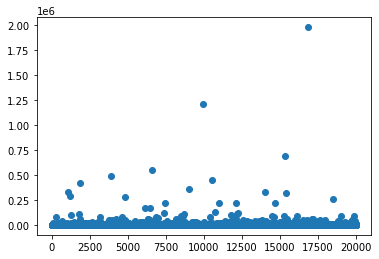

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.arange(len(y)), y)

In [ ]:
for i in range(len(df.loc[df['time'] > 1000])):
  state = df.loc[df['time'] > 1000].iloc[i]
  fig_2D, fig_3D, total_cost = init_cancerGDV(xg=state['xg'], xd=state['xd'], xv=state['xv'], ba=state['ba'], bv=state['bv'], c=state['c'], n_neigh=int(state['n_neigh']))
  print('State', i)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# (2754.4905942936352, (0.2705762977617871, 0.2765085024458289, 0.2688154960337811))
# (3102.6486057570078, (0.27323801382381124, 0.26711988244490686, 0.26927891476788524))